made on 5/nov - not 100% tested, but seems pretty gooood


In [149]:
from math import cos, sin, atan2, acos, sqrt, pi

import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [77]:
# def inv_kinematics(x,y,z,phi):
#     """ """
#     L1,L2,L3,L4 = 50, 93, 93, 50 # mm
#     r = sqrt(x*x + y*y)
#     s = z - L1 - L4*sin(phi)
#     theta1 = atan2(y,x)
#     theta3 = acos((r*r + s*s - L2*L2 - L3*L3)/(2*L2*L3))
#     print(r*r - s*s)
#     theta2 = atan2(r, s) - atan2(L3*sin(theta3), L2 + L3*cos(theta3))
#     theta4 = phi - theta2 - theta3
    
#     return theta1, theta2, theta3, theta4

In [85]:
def inv_kinematics(x,y,z,phi):
    """ """
    L1,L2,L3,L4 = 50, 93, 93, 50 # mm

    theta1 = atan2(y, x)

    A = x - L4*cos(theta1)*cos(phi)
    B = y - L4*sin(theta1)*cos(phi)
    C = z - L1 - L4*sin(phi)

    theta3 = acos((A*A + B*B + C*C - L2*L2 - L3*L3)/(2*L2*L3))
    a = L3*sin(theta3)
    b = L2 + L3*cos(theta3)

    c = z - L1 - L4*sin(phi)
    r = sqrt(a*a + b*b)

    theta2 = atan2(c, sqrt(r*r - c*c)) - atan2(a,b)

    theta4 = phi - theta2 - theta3
    
    return theta1, theta2, theta3, theta4

In [86]:
from math import cos, sin

def forward_kinematics(t1, t2, t3, t4):
    """ straight out of chatgpt """
    # Row 1
    r11 = (cos(t4 + t3 + t1 + t2) + cos(-t4 - t3 + t1 - t2)) / 2
    r12 = (-sin(t4 + t3 + t1 + t2) + sin(-t4 - t3 + t1 - t2)) / 2
    r13 = sin(t1)
    r14 = (25 * cos(t4 + t3 + t1 + t2) + 25 * cos(-t4 - t3 + t1 - t2) +
           (93 * cos(-t3 + t1 - t2) + 93 * cos(t3 + t1 + t2) + 
           93 * cos(t1 - t2) + 93 * cos(t1 + t2)) / 2)

    # Row 2
    r21 = (sin(-t4 - t3 + t1 - t2) + sin(t4 + t3 + t1 + t2)) / 2
    r22 = (-cos(-t4 - t3 + t1 - t2) + cos(t4 + t3 + t1 + t2)) / 2
    r23 = -cos(t1)
    r24 = (25 * sin(-t4 - t3 + t1 - t2) + 25 * sin(t4 + t3 + t1 + t2) +
           (93 * sin(t3 + t1 + t2) + 93 * sin(-t3 + t1 - t2) + 
           93 * sin(t1 + t2) + 93 * sin(t1 - t2)) / 2)

    # Row 3
    r31 = sin(t2 + t3 + t4)
    r32 = cos(t2 + t3 + t4)
    r33 = 0
    r34 = 50 + 50 * sin(t2 + t3 + t4) + 93 * sin(t2 + t3) + 93 * sin(t2)

    # Row 4 (last row in homogeneous transformation matrices)
    r41 = 0
    r42 = 0
    r43 = 0
    r44 = 1

    # Assembling the 4x4 matrix as a nested list
    transformation_matrix = [
        [r11, r12, r13, r14],
        [r21, r22, r23, r24],
        [r31, r32, r33, r34],
        [r41, r42, r43, r44]
    ]

    return np.array(transformation_matrix)


In [116]:
forward_kinematics(*inv_kinematics(0,0,286,pi/2))

array([[  0.,  -1.,   0.,   0.],
       [  0.,   0.,  -1.,   0.],
       [  1.,   0.,   0., 286.],
       [  0.,   0.,   0.,   1.]])

In [129]:
inv_kinematics(0,0,286,pi/2)

(0.0, 1.5707963267948966, 0.0, 0.0)

In [137]:
out = forward_kinematics(*inv_kinematics(50,0,286-50,pi/2))
print(out)
print(atan2(out[0][2], out[1][2]))

[[  0.  -1.   0.  50.]
 [  0.   0.  -1.   0.]
 [  1.   0.   0. 236.]
 [  0.   0.   0.   1.]]
3.141592653589793


[[150.          32.         120.        ]
 [150.          31.5138481  125.55674169]
 [150.          30.07016387 130.94464459]]


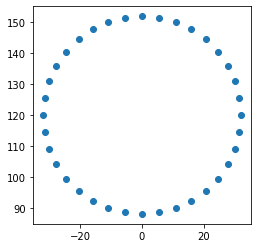

In [197]:

def point_on_circle(phi: float):
    poc = np.array([150, 0, 120])
    R = 32 # mm
    return poc + R * np.array([0, cos(phi), sin(phi)])

# around 0 - for testing
# def point_on_circle(phi: float):
#     poc = np.array([0, 0, 100])
#     R = 32 # mm
#     return poc + R * np.array([cos(phi), sin(phi),0])

ps = [point_on_circle(np.deg2rad(i)) for i in range(0, 360, 10)]
ps = np.array(ps)
print(ps[:3])
plt.scatter(ps[:,1], ps[:,2])
plt.gca().set_aspect('equal')

plt.show()

In [202]:
ps[0]

array([150.,  32., 120.])

In [204]:
ps[0] # array([150.,  32., 120.])
forward_kinematics(*inv_kinematics(*ps[0], pi/2))

array([[  0.        ,  -0.97799284,   0.20863847, 150.        ],
       [  0.        ,  -0.20863847,  -0.97799284,  32.        ],
       [  1.        ,   0.        ,   0.        , 120.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [207]:
angles = [inv_kinematics(*p, pi/2) for p in ps]
np.array(angles)

array([[ 0.21018259, -0.45918279,  1.17770037,  0.85227874],
       [ 0.20708061, -0.41665629,  1.16374914,  0.82370348],
       [ 0.19784529, -0.37549019,  1.15014123,  0.79614529],
       [ 0.18269205, -0.33688369,  1.1372975 ,  0.77038252],
       [ 0.16199085, -0.30197207,  1.1256229 ,  0.7471455 ],
       [ 0.13627807, -0.27179879,  1.11549268,  0.72710243],
       [ 0.10626486, -0.24728422,  1.10723844,  0.7108421 ],
       [ 0.07283523, -0.22919242,  1.10113479,  0.69885395],
       [ 0.03702801, -0.21809834,  1.09738747,  0.6915072 ],
       [ 0.        , -0.21435981,  1.09612396,  0.68903217],
       [-0.03702801, -0.21809834,  1.09738747,  0.6915072 ],
       [-0.07283523, -0.22919242,  1.10113479,  0.69885395],
       [-0.10626486, -0.24728422,  1.10723844,  0.7108421 ],
       [-0.13627807, -0.27179879,  1.11549268,  0.72710243],
       [-0.16199085, -0.30197207,  1.1256229 ,  0.7471455 ],
       [-0.18269205, -0.33688369,  1.1372975 ,  0.77038252],
       [-0.19784529, -0.